## Importing the required libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('movies.csv', lineterminator='\n')

## Exploring the dataset

In [4]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [7]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


## Observation
#### 1. No duplicate or null values.
#### 2. Data type of 'Release_Date' column needs to be change from Object to Date time.
#### 3. Removal of un-necessary columns like 'Overview', 'Poster-Url'.

In [5]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
df['Release_Date'] = df['Release_Date'].dt.year

In [42]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [6]:
drop_columns=['Overview', 'Poster_Url']
df.drop(drop_columns, axis = 1, inplace = True)

In [75]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,en,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,en,Thriller
3,2021,Encanto,2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War"


## Categorizing Movies based on Vote_Average Column

In [7]:
p75 = df['Vote_Average'].quantile(0.75)
p50 = df['Vote_Average'].quantile(0.50)
p25 = df['Vote_Average'].quantile(0.25)

def categorize(val):
    if val>=p75:
        return 'Popular'
    elif val>=p50 and val<p75:
        return 'Average'
    elif val>=p25 and val<p50:
        return 'Below Average'
    else:
        return 'Bad'

In [8]:
df['Ranking'] = df['Vote_Average'].apply(categorize)

In [78]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Ranking
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",Popular
1,2022,The Batman,3827.658,1151,8.1,en,"Crime, Mystery, Thriller",Popular
2,2022,No Exit,2618.087,122,6.3,en,Thriller,Below Average
3,2021,Encanto,2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",Popular
4,2021,The King's Man,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",Average


In [93]:
df['Ranking'].value_counts()

Ranking
Popular          2840
Average          2449
Below Average    2331
Bad              2207
Name: count, dtype: int64

### Now Checking Which Movie Genre has highest popularity

In [9]:
df['Genre'] = df['Genre'].str.split(',')
df_exploded = df.explode('Genre').reset_index(drop=True)
df_exploded.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Ranking
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,en,Action,Popular
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,en,Adventure,Popular
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,en,Science Fiction,Popular
3,2022,The Batman,3827.658,1151,8.1,en,Crime,Popular
4,2022,The Batman,3827.658,1151,8.1,en,Mystery,Popular


In [9]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Ranking
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,en,"[Action, Adventure, Science Fiction]",Popular
1,2022,The Batman,3827.658,1151,8.1,en,"[Crime, Mystery, Thriller]",Popular
2,2022,No Exit,2618.087,122,6.3,en,[Thriller],Below Average
3,2021,Encanto,2402.201,5076,7.7,en,"[Animation, Comedy, Family, Fantasy]",Popular
4,2021,The King's Man,1895.511,1793,7.0,en,"[Action, Adventure, Thriller, War]",Average


### Casting Genre column into category

In [10]:
df_exploded['Genre'] = df_exploded['Genre'].str.strip()
df_exploded['Genre'] = df_exploded['Genre'].astype('category')
df_exploded['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [11]:
df = df_exploded

In [43]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Ranking
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,en,Action,Popular
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,en,Adventure,Popular
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,en,Science Fiction,Popular
3,2022,The Batman,3827.658,1151,8.1,en,Crime,Popular
4,2022,The Batman,3827.658,1151,8.1,en,Mystery,Popular


In [44]:
df['Genre'].describe()

count     25793
unique       19
top       Drama
freq       3744
Name: Genre, dtype: object

# Now obtaining some insights from the Netflix data

## 1. Most Released Genre on Netflix

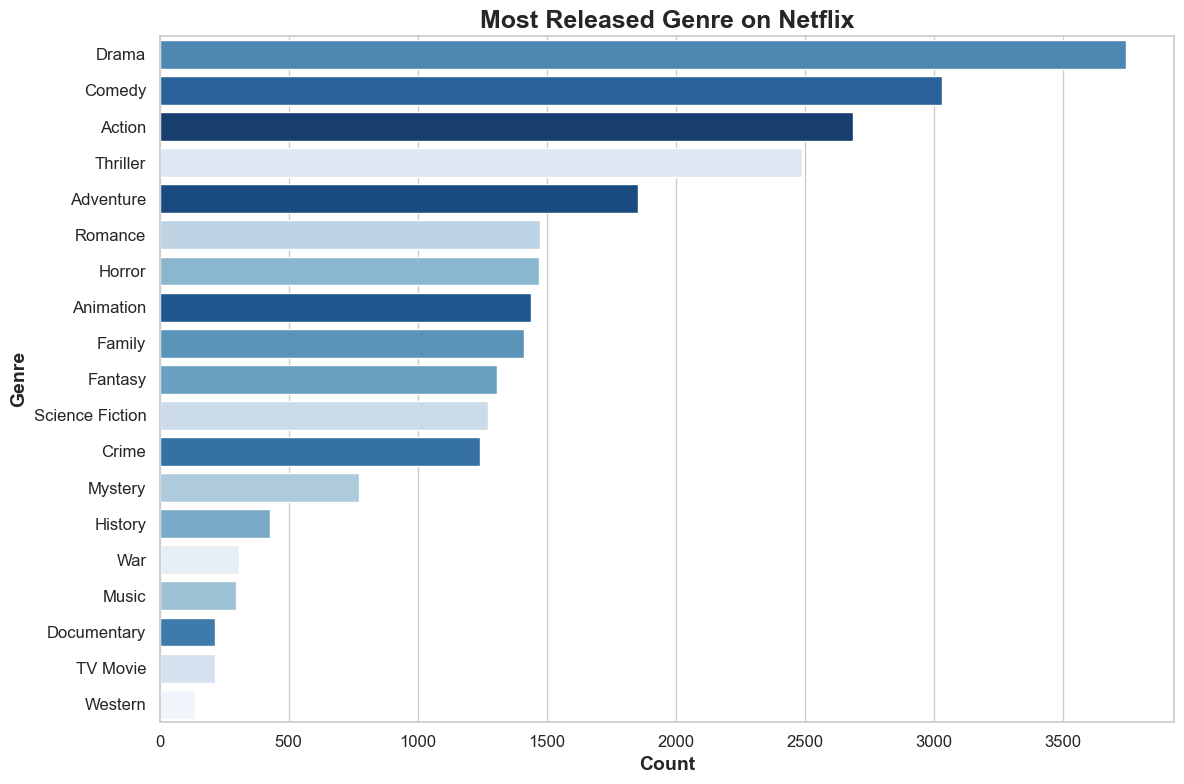

In [12]:
sns.set_theme(style="whitegrid")

counts = df['Genre'].value_counts()
genres = counts.index
values = counts.values

plt.figure(figsize=(12, 8))

sns.barplot(
    x=values,
    y=genres,
    hue=genres,
    dodge=False,
    legend=False,
    palette="Blues_r",
    order=genres
)

plt.title("Most Released Genre on Netflix", fontsize=18, weight='bold')
plt.xlabel("Count", fontsize=14, weight='bold')
plt.ylabel("Genre", fontsize=14, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

## 2. Most Popular Genres on Netflix

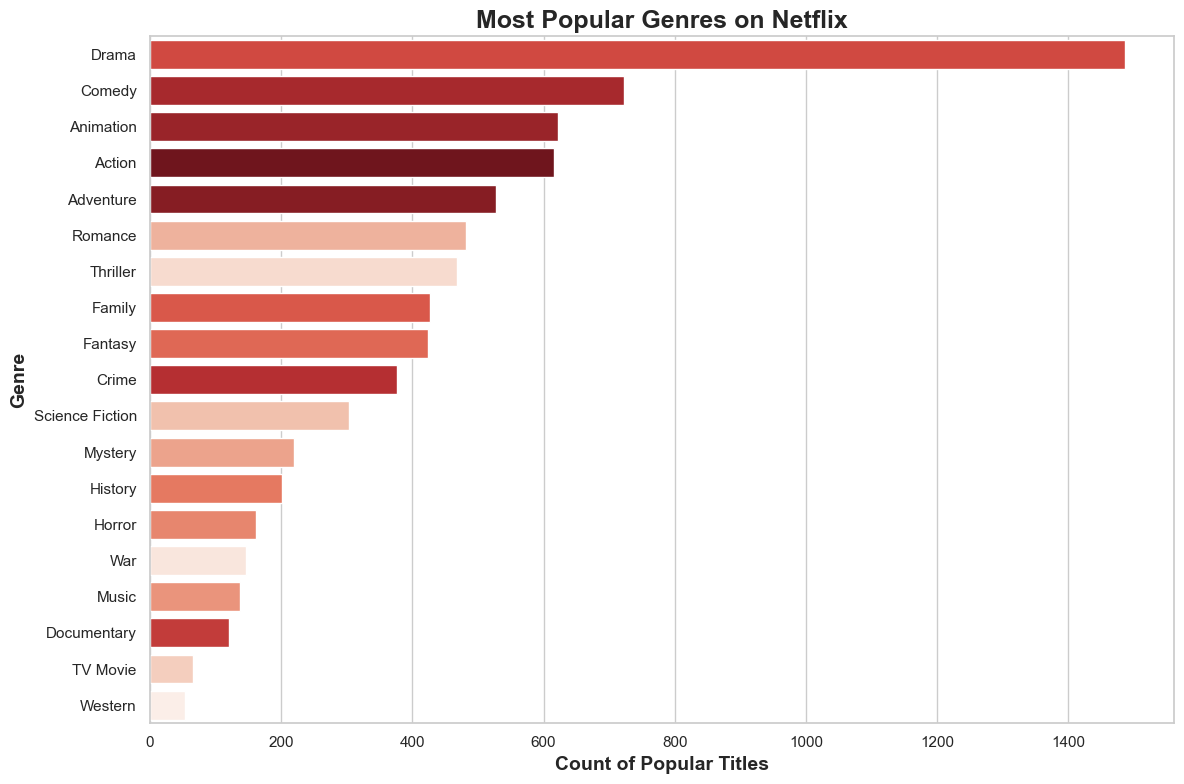

In [13]:
popular_df = df[df['Ranking'] == 'Popular']
popular_genre_counts = popular_df['Genre'].value_counts()
counts = popular_genre_counts
genres = counts.index
values = counts.values

plt.figure(figsize=(12,8))
sns.barplot(
    x=values,
    y=genres,
    hue=genres,
    dodge=False,
    legend=False,
    palette="Reds_r",
    order=genres
)

plt.title("Most Popular Genres on Netflix", fontsize=18, weight='bold')
plt.xlabel("Count of Popular Titles", fontsize=14, weight='bold')
plt.ylabel("Genre", fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

In [70]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Ranking
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,en,Action,Popular
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,en,Adventure,Popular
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,en,Science Fiction,Popular
3,2022,The Batman,3827.658,1151,8.1,en,Crime,Popular
4,2022,The Batman,3827.658,1151,8.1,en,Mystery,Popular


In [14]:
df['Release_Date'].value_counts().sort_values(ascending=False)

Release_Date
2021    1638
2018    1387
2017    1365
2019    1272
2016    1212
        ... 
1920       4
1902       3
1925       2
1929       2
1930       2
Name: count, Length: 102, dtype: int64

## 3. Year with the Highest Titles

In [24]:
df_clean = df.drop_duplicates(subset=['Title', 'Release_Date'])
df_clean.head()
df_clean['Release_Date'].value_counts().idxmax()

np.int32(2021)